# Załadowanie potrzebnych bibliotek

#### Wyjaśnienie kodu
Ten kod importuje kilka bibliotek i modułów niezbędnych do przetwarzania obrazów, budowania i trenowania modelu głębokiego uczenia oraz podziału danych na zbiory treningowe i testowe.

#### Importy TensorFlow, NumPy i Pandas:
- `import tensorflow as tf`: Importuje bibliotekę TensorFlow, która jest używana do budowania i trenowania modeli głębokiego uczenia.
- `import numpy as np`: Importuje bibliotekę NumPy, która jest używana do operacji numerycznych na tablicach.
- `import pandas as pd`: Importuje bibliotekę Pandas, która jest używana do manipulacji i analizy danych w formie tabelarycznej.

#### Importy Matplotlib i os:
- `import matplotlib.pyplot as plt`: Importuje bibliotekę Matplotlib do tworzenia wykresów i wizualizacji danych.
- `import os`: Importuje moduł os, który jest używany do interakcji z systemem operacyjnym, np. do pracy z plikami i katalogami.
- `import random`: Importuje moduł random, który jest używany do generowania losowych liczb i wyborów.

#### Importy z TensorFlow Keras:
- `from tensorflow.keras.preprocessing.image import load_img, img_to_array`: Importuje funkcje `load_img` i `img_to_array`, które są używane do ładowania i przetwarzania obrazów.
- `from tensorflow.keras.models import Sequential`: Importuje klasę `Sequential`, która jest używana do tworzenia sekwencyjnych modeli sieci neuronowych.
- `from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout`: Importuje warstwy `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense` i `Dropout`, które są używane do budowy konwolucyjnych sieci neuronowych (CNN).
- `from tensorflow.keras.optimizers import Adam`: Importuje optymalizator `Adam`, który jest używany do trenowania modeli.
- `from tensorflow.keras.callbacks import EarlyStopping`: Importuje callback `EarlyStopping`, który jest używany do zatrzymywania treningu, gdy model przestaje się poprawiać, aby uniknąć przeuczenia.

#### Importy z Scikit-learn:
- `from sklearn.model_selection import train_test_split`: Importuje funkcję `train_test_split`, która jest używana do podziału danych na zestawy treningowe i testowe.

In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array #type: ignore
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout #type: ignore
from tensorflow.keras.optimizers import Adam #type: ignore
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint #type: ignore
from tensorflow.keras.regularizers import l2 #type: ignore
from tensorflow.keras.layers import BatchNormalization #type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator #type: ignore

# Przetwarzanie i Podział Danych Obrazowych

#### Wyjaśnienie kodu
Ten kod ładuje obrazy z katalogu, przetwarza je, normalizuje i dzieli na zbiory treningowe i testowe.

#### Ustawienie ścieżki do katalogu z danymi:
- `data_dir = 'data'`: Zmienna `data_dir` przechowuje ścieżkę do katalogu, w którym znajdują się obrazy.

#### Inicjalizacja list na obrazy i etykiety:
- `images = []`: Lista `images` będzie przechowywać obrazy.
- `labels = []`: Lista `labels` będzie przechowywać odpowiadające im etykiety.

#### Iteracja po plikach w katalogu z danymi:
- Pętla iteruje po wszystkich plikach w katalogu `data_dir`. Jeśli plik ma rozszerzenie `.jpg` lub `.png`, sprawdzamy, czy nazwa pliku jest w odpowiednim formacie. Jeśli tak, ładujemy obraz, konwertujemy go na tablicę NumPy i dodajemy do listy `images`. Etykieta (wiek) jest wyodrębniana z nazwy pliku i dodawana do listy `labels`.

#### Konwersja list na tablice NumPy:
- `images = np.array(images)`: Lista `images` jest konwertowana na tablicę NumPy.
- `labels = np.array(labels)`: Lista `labels` jest konwertowana na tablicę NumPy.

#### Normalizacja obrazów:
- `images = images / 255.0`: Wartości pikseli obrazów są skalowane do zakresu [0, 1] przez podzielenie przez 255.

#### Podział danych na zbiory treningowe i testowe:
- `X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)`: Dane są dzielone na zbiory treningowe i testowe za pomocą funkcji `train_test_split`. 20% danych jest przeznaczone na zbiór testowy (`test_size=0.2`), a reszta na zbiór treningowy. Parametr `random_state` zapewnia powtarzalność podziału.

#### Wyświetlenie kształtu danych:
- `print("Kształt danych treningowych:", X_train.shape)`: Wyświetla kształt danych treningowych.
- `print("Kształt etykiet treningowych:", y_train.shape)`: Wyświetla kształt etykiet treningowych.
- `print("Kształt danych testowych:", X_test.shape)`: Wyświetla kształt danych testowych.
- `print("Kształt etykiet testowych:", y_test.shape)`: Wyświetla kształt etykiet testowych.

In [2]:
data_dir = 'data'

images = []
ages = []  # zmiana z labels na ages dla większej czytelności

for filename in os.listdir(data_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        parts = filename.split('_')
        if len(parts) >= 1:  # sprawdzamy czy nazwa pliku ma odpowiedni format
            img_path = os.path.join(data_dir, filename)
            img = load_img(img_path, target_size=(128, 128))
            img_array = img_to_array(img)
            
            images.append(img_array)
            
            # Pobieramy wiek z pierwszej części nazwy pliku
            age = int(parts[0])  # konwertujemy na int
            ages.append(age)

images = np.array(images)
ages = np.array(ages)

# Normalizacja obrazów
images = images / 255.0

X_train, X_test, y_train, y_test = train_test_split(images, ages, test_size=0.2, random_state=42)

# Wyświetlanie Przykładowego Zdjęcia z Informacjami o Wieku, Płci i Rasie

#### Wyjaśnienie kodu
Ten kod definiuje funkcję, która losowo wybiera obraz z katalogu, przetwarza go i wyświetla wraz z informacjami o wieku, płci i rasie osoby na zdjęciu.

#### Definicja funkcji `show_sample_image`:
- `def show_sample_image(data_dir)`: Funkcja przyjmuje ścieżkę do katalogu z danymi jako argument.

#### Lista plików w katalogu:
- `files = [f for f in os.listdir(data_dir) if f.endswith('.jpg') or f.endswith('.png')]`: Tworzymy listę plików w katalogu, które mają rozszerzenie `.jpg` lub `.png`.

#### Wybór losowego pliku:
- `filename = random.choice(files)`: Wybieramy losowy plik z listy.

#### Ścieżka do pliku:
- `img_path = os.path.join(data_dir, filename)`: Tworzymy pełną ścieżkę do wybranego pliku.

#### Załaduj obraz:
- `img = load_img(img_path, target_size=(128, 128))`: Ładujemy obraz i zmieniamy jego rozmiar na 128x128 pikseli.
- `img_array = img_to_array(img) / 255.0`: Konwertujemy obraz na tablicę NumPy i normalizujemy wartości pikseli.

#### Wyodrębnij informacje z nazwy pliku:
- `parts = filename.split('_')`: Dzielimy nazwę pliku na części.
- `age = parts[0]`: Wyodrębniamy wiek z pierwszej części nazwy pliku.
- `gender = 'Male' if parts[1] == '1' else 'Female'`: Wyodrębniamy płeć z drugiej części nazwy pliku.
- `race = parts[2]`: Wyodrębniamy rasę z trzeciej części nazwy pliku.

#### Mapa ras:
- `race_map = {...}`: Tworzymy mapę ras, przypisując odpowiednie wartości na podstawie kodu rasy.
- `race = race_map.get(race, 'Unknown')`: Przypisujemy odpowiednią wartość rasy na podstawie wyodrębnionego kodu rasy.

#### Wyświetl obraz z informacjami:
- `plt.imshow(img_array)`: Wyświetlamy obraz.
- `plt.title(f'Age: {age}, Gender: {gender}, Race: {race}')`: Ustawiamy tytuł obrazu zawierający wiek, płeć i rasę.
- `plt.axis('off')`: Wyłączamy osie.
- `plt.show()`: Wyświetlamy obraz.

#### Przykład użycia:
- `data_dir = 'data'`: Ustawiamy ścieżkę do katalogu z danymi.
- `show_sample_image(data_dir)`: Wywołujemy funkcję `show_sample_image` z odpowiednią ścieżką do katalogu z danymi.

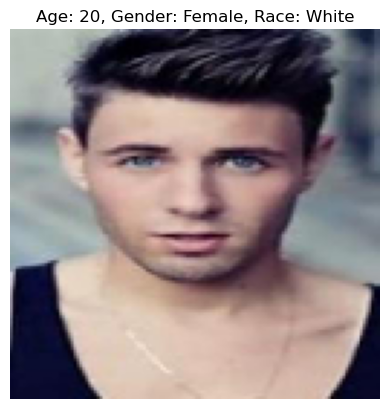

In [3]:
def show_sample_image(data_dir):
    files = [f for f in os.listdir(data_dir) if f.endswith('.jpg') or f.endswith('.png')]
    
    filename = random.choice(files)
    
    img_path = os.path.join(data_dir, filename)
    
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    
    parts = filename.split('_')
    age = parts[0]
    gender = 'Male' if parts[1] == '1' else 'Female'
    race = parts[2]
    
    race_map = {
        '0': 'White',
        '1': 'Black',
        '2': 'Asian',
        '3': 'Indian',
        '4': 'Other'
    }
    
    race = race_map.get(race, 'Unknown')
    
    plt.imshow(img_array)
    plt.title(f'Age: {age}, Gender: {gender}, Race: {race}')
    plt.axis('off')
    plt.show()

data_dir = 'data'
show_sample_image(data_dir)

# Definicja i Kompilacja Modelu

#### Wyjaśnienie kodu
Ten kod definiuje i kompiluje model konwolucyjnej sieci neuronowej (CNN) do regresji, który przewiduje wartość ciągłą na podstawie obrazów wejściowych.

#### Definicja modelu:
- `Sequential`: Tworzy sekwencyjny model.
- `Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3))`: Dodaje warstwę konwolucyjną z 32 filtrami, rozmiarem jądra (3, 3), funkcją aktywacji ReLU i kształtem wejściowym (128, 128, 3).
- `MaxPooling2D((2, 2))`: Dodaje warstwę maksymalnego spoolingowania z rozmiarem okna (2, 2).
- `Conv2D(64, (3, 3), activation='relu')`: Dodaje warstwę konwolucyjną z 64 filtrami, rozmiarem jądra (3, 3) i funkcją aktywacji ReLU.
- `MaxPooling2D((2, 2))`: Dodaje warstwę maksymalnego spoolingowania z rozmiarem okna (2, 2).
- `Conv2D(128, (3, 3), activation='relu')`: Dodaje warstwę konwolucyjną z 128 filtrami, rozmiarem jądra (3, 3) i funkcją aktywacji ReLU.
- `MaxPooling2D((2, 2))`: Dodaje warstwę maksymalnego spoolingowania z rozmiarem okna (2, 2).
- `Flatten()`: Spłaszcza dane wejściowe.
- `Dense(512, activation='relu')`: Dodaje w pełni połączoną warstwę z 512 jednostkami i funkcją aktywacji ReLU.
- `Dropout(0.5)`: Dodaje warstwę dropout z współczynnikiem 0.5, aby zapobiec przeuczeniu.
- `Dense(1, activation='linear')`: Dodaje w pełni połączoną warstwę wyjściową z 1 jednostką i liniową funkcją aktywacji, odpowiednią dla regresji.

#### Kompilacja modelu:
- `optimizer=Adam(learning_rate=0.0001)`: Używa optymalizatora Adam z określoną szybkością uczenia.
- `loss='mean_squared_error'`: Używa średniego błędu kwadratowego jako funkcji straty, odpowiedniej dla regresji.
- `metrics=['mae']`: Używa średniego błędu bezwzględnego jako metryki, która mierzy średnią różnicę między przewidywanymi a rzeczywistymi wartościami.

#### Wyświetlenie podsumowania modelu:
- `model.summary()`: Wyświetla podsumowanie modelu, w tym informacje o warstwach, kształtach danych wejściowych i wyjściowych oraz liczbie parametrów do trenowania.

In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='huber', 
    metrics=['mae']
)

model.summary()

d:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 124, 124, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 58, 58, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 27, 27, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 27, 27, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 5,050,657 (19.27 MB)

 Trainable params: 5,048,865 (19.26 MB)

 Non-trainable params: 1,792 (7.00 KB)

# Trenowanie modelu
Wytrenuj model na zbiorze treningowym, monitorując jego wydajność na zbiorze walidacyjnym.

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=4),
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr, checkpoint],
    steps_per_epoch=len(X_train) // 32
)

plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='MAE treningowe')
plt.plot(history.history['val_mae'], label='MAE walidacyjne')
plt.xlabel('Epoka')
plt.ylabel('MAE')
plt.legend()
plt.show()

Epoch 1/100
 42/602 ━━━━━━━━━━━━━━━━━━━━ 52s 95ms/step - loss: 41.5649 - mae: 33.4131

# Ewaluacja modelu
Oceń wydajność modelu na zbiorze testowym i wyświetl wyniki.

151/151 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 361.3710 - mae: 14.2528
Strata testowa: 362.03
Średni błąd bezwzględny: 14.25 lat
151/151 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step


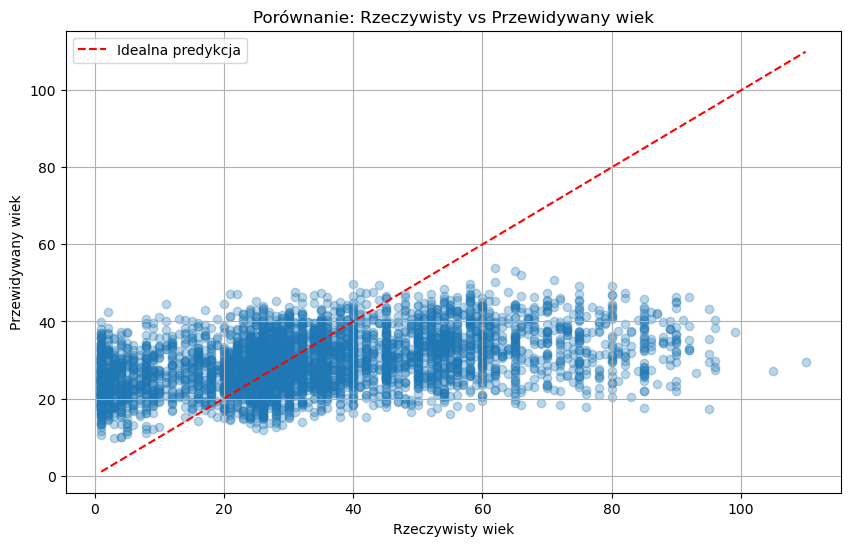

In [6]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Strata testowa: {test_loss:.2f}')
print(f'Średni błąd bezwzględny: {test_mae:.2f} lat')

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Idealna predykcja')
plt.xlabel('Rzeczywisty wiek')
plt.ylabel('Przewidywany wiek')
plt.title('Porównanie: Rzeczywisty vs Przewidywany wiek')
plt.legend()
plt.grid(True)
plt.show()

# Przewidywanie wieku na nowych zdjęciach
Użyj wytrenowanego modelu do przewidywania wieku na nowych, nieznanych zdjęciach.

In [7]:
new_data_dir = 'new_data'

new_images = []

for filename in os.listdir(new_data_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join(new_data_dir, filename)
        img = load_img(img_path, target_size=(128, 128))  
        img_array = img_to_array(img)
        
        new_images.append(img_array)

new_images = np.array(new_images)

new_images = new_images / 255.0

new_predictions = model.predict(new_images)

for i, filename in enumerate(os.listdir(new_data_dir)):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        print(f"Plik: {filename}, Przewidywany wiek: {new_predictions[i][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Plik: 01.png, Przewidywany wiek: 44.96516418457031
Plik: 02.jpg, Przewidywany wiek: 46.47893524169922
Plik: 03.jpg, Przewidywany wiek: 34.0211067199707
Plik: 04.jpg, Przewidywany wiek: 33.336761474609375
